Mental Health Counsel Chatbot

Kaggle Notebook: Mental Health Counsel Chatbot
Description: Provides mental health counseling data, which we used to supplement information from the primary dataset and align topics for consistent categorization.
https://www.kaggle.com/code/weiting016/mental-health-counsel-chatbot/notebook
Mental Health Synthetic Dataset

Kaggle Dataset: Mental Health Synthetic Dataset
Description: This primary dataset contains synthetic data on mental health symptoms, demographics, and treatment, forming the basis for model training and recommendation generation.

In [1]:
import pandas as pd

mental_df = pd.read_csv("raw_data/mental_health.csv")
mental_df.columns

Index(['User ID', 'Age', 'Gender', 'Symptoms', 'Duration (weeks)',
       'Previous Diagnosis', 'Therapy History', 'Medication',
       'Diagnosis / Condition', 'Suggested Therapy', 'Self-care Advice',
       'Urgency Level', 'Mood', 'Stress Level'],
      dtype='object')

In [2]:
cleaned_data_path = "cleaned_data"
raw_data_model_path = "raw_data"

In [3]:
pip


Usage:   
  c:\Users\ykim\AppData\Local\anaconda3\python.exe -m pip <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package

In [4]:
# Renmae columns: easy to follow up.
mental_df = mental_df.rename(columns= {
    'Diagnosis / Condition' : 'Diagnosis',
    'Self-care Advice': 'Self_Care_Advice',
    'Therapy History' : 'Therapy_History',
    'Stress Level' : 'Stress_Level',
    'Urgency Level' : 'Urgency_Level',
    'Suggested Therapy': 'Suggested_Therapy',
    'Duration (weeks)': 'Duration',
    'Previous Diagnosis': 'Prev_Diagnosis'
})

# Check renamed columns
mental_df.columns

Index(['User ID', 'Age', 'Gender', 'Symptoms', 'Duration', 'Prev_Diagnosis',
       'Therapy_History', 'Medication', 'Diagnosis', 'Suggested_Therapy',
       'Self_Care_Advice', 'Urgency_Level', 'Mood', 'Stress_Level'],
      dtype='object')

In [5]:
symptoms_unique_values = mental_df['Symptoms'].unique()
therapy_unique_values = mental_df['Suggested_Therapy'].unique()
diagnosis_unique_values = mental_df['Diagnosis'].unique()

print("Symtoms unique values \n", symptoms_unique_values)
print("therapy_unique_values \n", therapy_unique_values)
print("diagnosis_unique_values \n", diagnosis_unique_values)

Symtoms unique values 
 ['feeling anxious' 'excessive worry' 'trouble sleeping'
 'loss of interest in activities' 'panic attacks' 'lack of concentration'
 'feeling irritable' 'feeling sad' 'feeling overwhelmed']
therapy_unique_values 
 ['Support Groups' 'Cognitive Behavioral Therapy' 'Psychotherapy'
 'Mindfulness-Based Therapy' 'No Therapy Needed']
diagnosis_unique_values 
 ['Panic Disorder' 'Depression' 'Anxiety' 'Burnout' 'Stress']


A label encoder is a technique that converts non-numerical data into numerical values, 
which is useful for machine learning and data analysis. <br>
It's often used when working with categorical data, such as ordinal data, 
where there's a hierarchy among the values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
# Target supposed to be Target Supposed.

def build_self_test_self_care_advice():
    le_diagnosis = LabelEncoder()
    le_symtoms = LabelEncoder()
    le_self_care = LabelEncoder()
    le_therapy = LabelEncoder()
    # mental_df['Duration'] is already Int style, we don't have to encode it
    
    mental_df['Diagnosis_encoded'] = le_diagnosis.fit_transform(mental_df['Diagnosis'])
    mental_df['Symptoms_encoded'] = le_symtoms.fit_transform(mental_df['Symptoms'])
    mental_df['Self_Care_Advice_encoded'] = le_self_care.fit_transform(mental_df['Self_Care_Advice'])
    mental_df['Suggested_Therapy_encoded'] = le_therapy.fit_transform(mental_df['Suggested_Therapy'])

    # Training Data
    X = mental_df[['Diagnosis_encoded', 'Symptoms_encoded']]
    y_self_care = mental_df['Self_Care_Advice_encoded']
    y_therapy = mental_df['Suggested_Therapy_encoded']

    X_train, X_test, y_self_care_train, y_self_care_test, y_therapy_train, y_therapy_test = train_test_split(X, y_self_care, y_therapy, test_size=0.2, random_state=42)
    # Train models for Self Care Advice and Suggested Therapy
    model_self_care = RandomForestClassifier()
    model_therapy = RandomForestClassifier()

    model_self_care.fit(X_train, y_self_care_train)
    model_therapy.fit(X_train, y_therapy_train)

    # Make predictions
    self_care_pred = model_self_care.predict(X_test)
    therapy_pred = model_therapy.predict(X_test)

    # Display classification reports
    print("Self Care Advice Classification Report:")
    self_care_report = classification_report(y_self_care_test, self_care_pred, target_names=le_self_care.classes_)
    print(self_care_report)
    print("\nSuggested Therapy Classification Report:")
    self_therapy_report = classification_report(y_therapy_test, therapy_pred, target_names=le_therapy.classes_)
    print(self_therapy_report)
    return model_self_care , model_therapy, le_diagnosis, le_symtoms, le_self_care, le_therapy, self_care_report, self_therapy_report

# Initial Reports

### Self Care Advice Classification Report

| Self Care Advice       | Precision | Recall | F1-Score | Support |
|------------------------|-----------|--------|----------|---------|
| Breathing Exercises    | 0.20      | 0.17   | 0.18     | 166     |
| Exercise               | 0.17      | 0.24   | 0.20     | 181     |
| Journaling             | 0.32      | 0.14   | 0.20     | 191     |
| Meditation             | 0.11      | 0.03   | 0.04     | 116     |
| Take Breaks            | 0.17      | 0.33   | 0.23     | 164     |
| Talk to a Friend       | 0.22      | 0.21   | 0.21     | 182     |
| **Accuracy**           |           |        | 0.19     | 1000    |
| **Macro Avg**          | 0.20      | 0.19   | 0.18     | 1000    |
| **Weighted Avg**       | 0.21      | 0.19   | 0.18     | 1000    |

### Suggested Therapy Classification Report

| Suggested Therapy               | Precision | Recall | F1-Score | Support |
|---------------------------------|-----------|--------|----------|---------|
| Cognitive Behavioral Therapy    | 0.16      | 0.13   | 0.14     | 200     |
| Mindfulness-Based Therapy       | 0.14      | 0.03   | 0.05     | 189     |
| No Therapy Needed               | 0.17      | 0.09   | 0.11     | 187     |
| Psychotherapy                   | 0.17      | 0.31   | 0.22     | 202     |
| Support Groups                  | 0.24      | 0.34   | 0.28     | 222     |
| **Accuracy**                    |           |        | 0.19     | 1000    |
| **Macro Avg**                   | 0.17      | 0.18   | 0.16     | 1000    |
| **Weighted Avg**                | 0.18      | 0.19   | 0.17     | 1000    |



In [7]:
# model_self_care , model_therapy, le_diagnosis, le_symtoms, le_self_care, le_therapy, self_care_report, self_therapy_report = build_model()
# Save model for purpose
import joblib
def save_model(model_self_care , model_therapy, le_diagnosis, le_symtoms, le_self_care, le_therapy ):
    joblib.dump(model_self_care, "model_self_care.pkl")
    joblib.dump(model_therapy, "model_therapy.pkl")
    joblib.dump(le_diagnosis, "le_diagnosis.pkl")
    joblib.dump(le_symtoms, "le_symtoms.pkl")
    joblib.dump(le_self_care, "le_self_care.pkl")
    joblib.dump(le_therapy, "le_therapy.pkl")

# save_model(model_self_care , model_therapy, le_diagnosis, le_symtoms, le_self_care, le_therapy)

Current accuracy 0.18 precison also,
To imporve this models. <br>
There are serveral ways to imporve ways.<br>
Add more parameters (which contains demographic infomrationm which user can simply input them), also re mapping based Diagnosis.<br>
I created three value includes 2 informaiton.<br>
It wil help to organize better modeling. <br>
Current features has <br>


In [8]:
print("Gender",mental_df['Gender'].unique())
print("Duration: ", mental_df['Duration'].unique())
print("Urgency Label", mental_df['Urgency_Level'].unique())
print("Stress level", mental_df['Stress_Level'].unique())
print("Prev_diagnosis", mental_df['Prev_Diagnosis'].unique())
print("Symtoms:", mental_df['Symptoms'].unique())

Gender ['Other' 'Female' 'Non-binary' 'Male']
Duration:  [29 37 47 35 22  8 31 20 21  9 38 43 30  2  3 34 36 19 33 23 46 49 48 41
 11 16 10 45 13  4 39 12 51 24 17 32  1 14 44 15 26  5 40 27 42 18  6 50
 28 25  7]
Urgency Label ['Moderate' 'High' 'Low' 'Critical']
Stress level [ 1  4  5  2  6  9 10  8  7  3]
Prev_diagnosis ['OCD' 'None' 'PTSD' 'Bipolar Disorder' 'Anxiety' 'Depression']
Symtoms: ['feeling anxious' 'excessive worry' 'trouble sleeping'
 'loss of interest in activities' 'panic attacks' 'lack of concentration'
 'feeling irritable' 'feeling sad' 'feeling overwhelmed']


In [9]:
# !pip3 install --upgrade numpy
# !pip3 show numpy



In [10]:
# Diagnosis Group
from sklearn.preprocessing import LabelEncoder

def group_diagnosis(row):
    if row['Diagnosis'] in ['Panic Disorder', 'Anxiety']:
        return 'Anxiety Disorders'
    elif row['Diagnosis'] in ['Depression', 'Burnout']:
        return 'Mood Disorders'
    elif row['Diagnosis'] == 'Stress':
        return 'Stress-Related Disorders'
def group_prev_diagnosis(row):
    if row['Prev_Diagnosis'] in ['Panic Disorder', 'Anxiety', 'OCD']:
        return 'Anxiety Disorders'
    elif row['Prev_Diagnosis'] in ['Depression', 'Bipolar Disorder']:
        return 'Mood Disorders'
    elif row['Prev_Diagnosis'] in ['Stress', 'PTSD']:
        return 'Stress-Related Disorders'
    else:
        return ''

def re_map_gender(row):
    if row['Gender'] == 'Male':
        return 1
    elif row['Gender'] == 'Female':
        return 2
    else:
        return 3
def re_map_urgency_level(row):
    if row["Urgency_Level"] == "Low":
        return 1
    elif row["Urgency_Level"] == "Moderate":
        return 2
    elif row["Urgency_Level"] == "High":
        return 3
    else:
        return 4
    
# Inital diagnosis model
def improved_test_reports_diagnosis(mental_df):
    # Diagnosis Group
    mental_df["Diagnosis_Group"] = mental_df.apply(group_diagnosis, axis=1)
    mental_df['Prev_Diagnosis_Group'] = mental_df.apply(group_prev_diagnosis, axis=1)
    mental_df["Re_Gender"] = mental_df.apply(re_map_gender, axis=1)
    mental_df["Urgency_Level"] = mental_df.apply(re_map_urgency_level, axis=1)
    
    le_diagnosis_group = LabelEncoder()
    le_prev_Diagnosis_group = LabelEncoder()
    le_symtoms = LabelEncoder()

    mental_df['Diagnosis_Group_encoded'] = le_diagnosis_group.fit_transform(mental_df['Diagnosis_Group'])
    mental_df['Prev_Diagnosis_Group_encoded'] =  le_prev_Diagnosis_group.fit_transform(mental_df['Prev_Diagnosis'])
    mental_df['Symptoms_encoded'] = le_symtoms.fit_transform(mental_df['Symptoms'])

    # Training Data with duration
    X = mental_df[['Age', 'Symptoms_encoded', "Re_Gender", "Prev_Diagnosis_Group_encoded", "Duration", "Stress_Level", "Urgency_Level"]] 
    y_diagnosis = mental_df['Diagnosis_Group_encoded']

    X_train, X_test, y_diagnosis_train, y_diagnosis_test = train_test_split(X, y_diagnosis, test_size=0.2, random_state=42)
    
    # Train model for Diagnosis
    model_diagnosis = RandomForestClassifier()
    model_diagnosis.fit(X_train, y_diagnosis_train)

    # Make predictions
    diagnos_pred = model_diagnosis.predict(X_test)

    # Display classification reports
    print("Diagnosis Group Classification Report:")
    diagnosis_report = classification_report(y_diagnosis_test, diagnos_pred, target_names=le_diagnosis_group.classes_)
    print(diagnosis_report)
    
    return model_diagnosis, le_diagnosis_group, le_prev_Diagnosis_group, le_symtoms, diagnosis_report

model_diagnosis, le_diagnosis_group, le_prev_Diagnosis_group, le_symtoms, diagnosis_report = improved_test_reports_diagnosis(mental_df)


Diagnosis Group Classification Report:
                          precision    recall  f1-score   support

       Anxiety Disorders       0.46      0.62      0.53       422
          Mood Disorders       0.48      0.42      0.45       440
Stress-Related Disorders       0.26      0.09      0.13       138

                accuracy                           0.46      1000
               macro avg       0.40      0.37      0.37      1000
            weighted avg       0.44      0.46      0.44      1000



In [11]:
import joblib
import os

# Download Model
def createModel(model_diagnosis, le_diagnosis_group, le_prev_Diagnosis_group, le_symtoms):
      # Save the model to the diagnosisModel folder
    os.makedirs('trained_models/01_diagnosis_model', exist_ok=True)
    model_path = 'trained_models/01_diagnosis_model/'
    joblib.dump(model_diagnosis, f'{model_path}diagnosis_model.pkl')
    joblib.dump(le_diagnosis_group, f'{model_path}le_diagnosis_group.pkl')
    joblib.dump(le_prev_Diagnosis_group, f'{model_path}le_prev_Diagnosis_group.pkl')
    joblib.dump(le_symtoms, f'{model_path}le_symptoms.pkl')
    print(f"Model saved to {model_path}")
    
createModel(model_diagnosis, le_diagnosis_group, le_prev_Diagnosis_group, le_symtoms)


Model saved to trained_models/01_diagnosis_model/


In [12]:
import pkg_resources
import platform
import sys

# Print Python version
python_version = platform.python_version()
python_executable = sys.executable
print(f"Python Executable Location: {python_executable}\n")
print(f"Python Version: {python_version}\n")
with open("installed_packages.txt", "w") as file:
    for package in sorted(pkg_resources.working_set, key=lambda x: x.project_name.lower()):
        file.write(f"{package.project_name}=={package.version}\n")

Python Executable Location: c:\Users\ykim\AppData\Local\anaconda3\python.exe

Python Version: 3.11.5



In [13]:
!pip3 freeze

absl-py==2.1.0
aiobotocore @ file:///C:/b/abs_3cwz1w13nn/croot/aiobotocore_1701291550158/work
aiofiles @ file:///C:/b/abs_9ex6mi6b56/croot/aiofiles_1683773603390/work
aiohttp @ file:///C:/b/abs_bc6tmjiy12/croot/aiohttp_1701112585940/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
aiosqlite @ file:///C:/b/abs_9djc_0pyi3/croot/aiosqlite_1683773915844/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
altgraph==0.17.4
anaconda-anon-usage @ file:///C:/b/abs_f4tsjyl9va/croot/anaconda-anon-usage_1695310457827/work
anaconda-catalogs @ file:///C:/b/abs_8btyy0o8s8/croot/anaconda-catalogs_1685727315626/work
anaconda-client @ file:///C:/b/abs_80wttmgui4/croot/anaconda-client_1694625288614/work
anaconda-cloud-auth @ file:///C:/b/abs_5cjpnu6wjb/croot/anaconda-cloud-auth_1694462130037/work
anaconda-project @ file:///C:/ci_311/anaconda-project_1676458365912/work
anyio @ file:///C:/

In [14]:
import pandas as pd
import joblib
import random

def use_case():
    # Load pre-trained model and encoders
    model_path = 'trained_models/01_diagnosis_model/'
    model_diagnosis = joblib.load(f'{model_path}/diagnosis_model.pkl')
    le_diagnosis_group = joblib.load(f'{model_path}/le_diagnosis_group.pkl')  
    le_prev_Diagnosis_group = joblib.load(f'{model_path}/le_prev_Diagnosis_group.pkl')  
    le_symptoms = joblib.load(f'{model_path}/le_symptoms.pkl')

    # Random input data generation
    random_data = {
        "Age": random.randint(18, 65),  # Random age between 18 and 65
        "Symptoms": random.choice(le_symptoms.classes_),  # Random valid symptom from the encoder classes
        "Gender": random.choice(['Male', 'Female', 'Other']),  # Random gender
        "Prev_Diagnosis": random.choice(le_prev_Diagnosis_group.classes_),  # Random previous diagnosis
        "Duration": random.uniform(1.0, 10.0),  # Random duration between 1.0 and 10.0
        "Stress_Level": random.randint(1, 5),  # Random stress level between 1 and 5
        "Urgency_Level": random.choice(["Low", "Moderate", "High", "Critical"])  # Random urgency level
    }

    print("Random Test Input Data:", random_data)

    # Encode input data
    symptoms_encoded = le_symptoms.transform([random_data['Symptoms']])[0]
    re_gender = 1 if random_data['Gender'] == 'Male' else 2 if random_data['Gender'] == 'Female' else 3
    prev_diagnosis_group_encoded = le_prev_Diagnosis_group.transform([random_data['Prev_Diagnosis']])[0]
    urgency_level = 1 if random_data['Urgency_Level'] == 'Low' else 2 if random_data['Urgency_Level'] == 'Moderate' else 3 if random_data['Urgency_Level'] == 'High' else 4

    # Create input DataFrame
    input_data = pd.DataFrame([[random_data['Age'], symptoms_encoded, re_gender, prev_diagnosis_group_encoded,
                                random_data['Duration'], random_data['Stress_Level'], urgency_level]],
                              columns=['Age', 'Symptoms_encoded', 'Re_Gender', 'Prev_Diagnosis_Group_encoded',
                                       'Duration', 'Stress_Level', 'Urgency_Level'])
    
    # Make prediction
    prediction = model_diagnosis.predict(input_data)[0]
    diagnosis_group = le_diagnosis_group.inverse_transform([prediction])[0]

    print("Predicted Diagnosis Group:", diagnosis_group)

# Run the use case function
use_case()


Random Test Input Data: {'Age': 55, 'Symptoms': 'loss of interest in activities', 'Gender': 'Female', 'Prev_Diagnosis': 'Bipolar Disorder', 'Duration': 4.312718390985017, 'Stress_Level': 4, 'Urgency_Level': 'Low'}
Predicted Diagnosis Group: Anxiety Disorders


In [15]:
from sklearn.svm import SVC
def improved_test_reports_diagnosis_svm(mental_df):
    # Same preprocessing steps
    mental_df["Diagnosis_Group"] = mental_df.apply(group_diagnosis, axis=1)
    mental_df['Prev_Diagnosis_Group'] = mental_df.apply(group_prev_diagnosis, axis=1)
    mental_df["Re_Gender"] = mental_df.apply(re_map_gender, axis=1)
    mental_df["Urgency_Level"] = mental_df.apply(re_map_urgency_level, axis=1)

    le_diagnosis_group = LabelEncoder()
    le_prev_Diagnosis_group = LabelEncoder()
    le_symtoms = LabelEncoder()

    mental_df['Diagnosis_Group_encoded'] = le_diagnosis_group.fit_transform(mental_df['Diagnosis_Group'])
    mental_df['Prev_Diagnosis_Group_encoded'] = le_prev_Diagnosis_group.fit_transform(mental_df['Prev_Diagnosis'])
    mental_df['Symptoms_encoded'] = le_symtoms.fit_transform(mental_df['Symptoms'])

    X = mental_df[['Age', 'Symptoms_encoded', "Re_Gender", "Prev_Diagnosis_Group_encoded", "Duration", "Stress_Level", "Urgency_Level"]] 
    y_diagnosis = mental_df['Diagnosis_Group_encoded']

    X_train, X_test, y_diagnosis_train, y_diagnosis_test = train_test_split(X, y_diagnosis, test_size=0.2, random_state=42)

    # Train model using Support Vector Machine
    model_diagnosis = SVC(kernel='poly')  # You can also try 'rbf' or 'poly'
    model_diagnosis.fit(X_train, y_diagnosis_train)

    # Make predictions
    diagnos_pred = model_diagnosis.predict(X_test)

    # Display classification report
    print("Diagnosis Group Classification Report (SVM):")
    diagnosis_report = classification_report(y_diagnosis_test, diagnos_pred, target_names=le_diagnosis_group.classes_)
    print(diagnosis_report)

    return model_diagnosis, le_diagnosis_group, diagnosis_report

improved_test_reports_diagnosis_svm(mental_df)

Diagnosis Group Classification Report (SVM):
                          precision    recall  f1-score   support

       Anxiety Disorders       0.42      1.00      0.59       422
          Mood Disorders       0.00      0.00      0.00       440
Stress-Related Disorders       0.00      0.00      0.00       138

                accuracy                           0.42      1000
               macro avg       0.14      0.33      0.20      1000
            weighted avg       0.18      0.42      0.25      1000



c:\Users\ykim\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ykim\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ykim\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(SVC(kernel='poly'),
 LabelEncoder(),
 '                          precision    recall  f1-score   support\n\n       Anxiety Disorders       0.42      1.00      0.59       422\n          Mood Disorders       0.00      0.00      0.00       440\nStress-Related Disorders       0.00      0.00      0.00       138\n\n                accuracy                           0.42      1000\n               macro avg       0.14      0.33      0.20      1000\n            weighted avg       0.18      0.42      0.25      1000\n')

In [16]:
import nltk
from nltk.corpus import wordnet
from itertools import chain

# Based on questions and topics, Create chains then finds vlaues.
def find_related_words():
    nltk.download('wordnet')

    words = {
        'Panic': 'panic',
        'Disorder': 'disorder',
        'Depression': 'depression',
        'Burnout': 'burnout',
        'Stress': 'stress'
    }

    # Initialize a dictionary to store the results
    related_words = {}

    for key, word in words.items():
        word_synsets = wordnet.synsets(word)
        similar_words = set(chain(*[synset.lemma_names() for synset in word_synsets]))
        related_words[key] = list(similar_words)

    return related_words

# Get the related words and print the dictionary
similar_words_dict = find_related_words()
print(similar_words_dict)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ykim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{'Panic': ['terror', 'affright', 'panic', 'scare'], 'Disorder': ['disorder', 'disquiet', 'cark', 'disorderliness', 'distract', 'perturb', 'trouble', 'disarray', 'unhinge', 'upset'], 'Depression': ['Depression', 'depressive_disorder', 'imprint', 'slump', 'depression', 'impression', 'natural_depression', 'low', 'economic_crisis', 'Great_Depression', 'clinical_depression'], 'Burnout': [], 'Stress': ['emphasis', 'tenseness', 'stress', 'tension', 'emphasize', 'strain', 'punctuate', 'focus', 'accentuate', 'accent', 'try', 'emphasise']}


In [17]:
# Result for related words
# {'Panic': ['panic', 'scare', 'terror', 'affright'], 
# 'Disorder': ['distract', 'upset', 'trouble', 'disorderliness', 'cark', 'disarray', 'disorder', 'perturb', 'disquiet', 'unhinge'], 
# 'Depression': ['impression', 'clinical_depression', 'slump', 'Great_Depression', 'Depression', 'low', 'depressive_disorder', 'natural_depression', 'imprint', 'economic_crisis', 'depression'], 
# 'Burnout': [], 
# 'Stress': ['strain', 'emphasis', 'emphasize', 'tension', 'punctuate', 'focus', 'accentuate', 'try', 'tenseness', 'emphasise', 'stress', 'accent']}


In [18]:
# Counsel data training.

In [19]:
original_counsel_df = pd.read_csv("raw_data/counselchat-data.csv")

from collections import Counter
# Ensure you've downloaded the WordNet corpus
# Display the word frequencies
def get_word_frequencies(counsel_df):
    print("Orignal length" + str(len(counsel_df)))
    counsel_df = counsel_df[['questionText', 'topics','answerText']]
    all_words = ' '.join(counsel_df['topics'].astype(str)).replace(',', '').split()
    # Count the frequency of each word
    word_count = Counter(all_words)
    print("\nWord frequencies in the 'topics' column:")
    found_selected_count = 0
    stress_count = 0
    depression_count = 0
    disorder_count = 0
    anxiety_count = 0
    burn_out_count = 0
    for word, count in word_count.items():
        if word.__contains__("Stress"):
            stress_count +=count
        elif word.__contains__("Depression"):
            depression_count += count
        elif word.__contains__("Disorder"):
            disorder_count += count
        elif word.__contains__("Anxiety"):
            anxiety_count += count
        elif word.__contains__("Burnout"):
            burn_out_count += count
        else:
            print(f"{word} :  {count}")
    found_selected_count = stress_count + depression_count + disorder_count + anxiety_count + burn_out_count
    print("total counts" + str(len(counsel_df)))
    print("stress_count", stress_count)
    print("depression_count", depression_count)
    print("disorder_count", disorder_count)
    print("anxiety_count", anxiety_count)
    print("burn_out_count", burn_out_count)
    print("Found selcted count", found_selected_count)

get_word_frequencies(original_counsel_df)



Orignal length1482

Word frequencies in the 'topics' column:
Family :  119
Conflict :  91
Substance :  14
AbuseAddiction :  9
Behavioral :  49
ChangeSocial :  3
Relationships :  214
Relationship :  45
Dissolution :  68
Anger :  32
Management :  25
Sleep :  10
Improvement :  17
Professional :  34
EthicsLegal :  6
& :  45
Regulatory :  20
Social :  41
RelationshipsMarriage :  11
MarriageIntimacy :  26
Domestic :  9
ViolenceAnger :  2
ManagementFamily :  3
Human :  50
Sexuality :  33
ManagementSleep :  2
Military :  3
Issues :  10
RelationshipsDomestic :  3
Violence :  10
ViolenceRelationship :  1
Marriage :  25
Grief :  20
and :  23
Loss :  9
ConflictChildren :  1
Adolescents :  9
MarriageRelationship :  4
TraumaHuman :  1
RelationshipsIntimacy :  42
ManagementParenting :  1
Intimacy :  17
Workplace :  9
SexualityMarriage :  3
LGBTQ :  29
SpiritualityFamily :  2
Ethics :  23
ViolenceRelationships :  1
ConflictRelationships :  5
Self-esteem :  29
Self-esteemRelationships :  12
Parenting :

In [20]:
# https://my.clevelandclinic.org/health/diseases/22295-mental-health-disorders

import nltk
from nltk.corpus import wordnet

counsel_df = original_counsel_df
target_Keywords = {
    'Anxiety Disorders': ['panic disorder', 'anxiety'],
    'Mood Disorders': ['depression', 'burnout'],
    'Stress-Related Disorders': ['stress', 'PTSD']
}

similar_words_dict = {
    'panic': ['panic', 'scare', 'terror', 'affright'],
    'disorder': ['distract', 'upset', 'trouble', 'disorderliness', 'cark', 'disarray', 'disorder', 'perturb', 'disquiet', 'unhinge'],
    'depression': ['impression', 'clinical_depression', 'slump', 'Great_Depression', 'depression', 'low', 'depressive_disorder', 'natural_depression', 'imprint', 'economic_crisis', 'depression'],
    'burnout': [],
    'stress': ['strain', 'emphasis', 'emphasize', 'tension', 'punctuate', 'focus', 'accentuate', 'try', 'tenseness', 'emphasise', 'stress', 'accent']
}

def group_diagnosis(row):
    all_words = str(row['topics']).lower().split()

    for disorder, keywords in target_Keywords.items():
        for keyword in keywords:
            if any(keyword in word for word in all_words):
                return disorder
            if keyword in similar_words_dict:
                # Check if any of the similar words match
                if any(sim_word in all_words for sim_word in similar_words_dict[keyword]):
                    return disorder
    return None
# Original 120.
# print(similar_words_dict)
# Adding new counsel_df based on items
counsel_df["re_diagnosis"] = counsel_df.apply(group_diagnosis, axis=1)
# print(counsel_df['re_diagnosis'])
# print(len(counsel_df['re_diagnosis']))

# cd remapping diagnosis.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to create and train the model
# TfidfVectorizer
# LogicRegression
def create_diagnosis_model(train_data, target_column='re_diagnosis'):
    # Extract text and target columns
    X_train = train_data['topics']
    y_train = train_data[target_column]

    # TF-IDF vectorization
    tfidf = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_tfidf, y_train)

    # Evaluate model accuracy on the training set
    X_train_pred = model.predict(X_train_tfidf)
    accuracy = accuracy_score(y_train, X_train_pred)
    print(f"Training Accuracy: {accuracy}")

    return model, tfidf

# Function to make predictions using the trained model
def predict_missing_diagnoses(df, model, tfidf, target_column='re_diagnosis'):
    # Extarct out df re_diagnosis is None
    df_test = df[df[target_column].isna()]

    X_test = df_test['topics']
    print(f"Number of rows in test set: {len(X_test)}")
    X_test = df_test['topics'].fillna('')  # Replace NaN values with an empty string
    non_empty_mask = X_test.str.strip() != ''

    # 한번더 걸러준다
    df_test = df_test[non_empty_mask]
    X_test =  X_test[non_empty_mask]

    # 
    X_test_tfidf = tfidf.transform(X_test)

    # Predict missing diagnoses
    predictions = model.predict(X_test_tfidf)

    # Assign predictions back to the DataFrame
    df.loc[df[target_column].isna() & non_empty_mask, target_column] = predictions

    return df

# Example usage
# Step 1: Create model
# Training and prediction process
df_train = counsel_df[counsel_df['re_diagnosis'].notna()]
model, tfidf = create_diagnosis_model(df_train)
remapped_consel_df = predict_missing_diagnoses(counsel_df, model, tfidf)



remapped_consel_df.to_csv("cleaned_data/predicted_consel_data.csv", index=False)




Training Accuracy: 0.9976133651551312
Number of rows in test set: 1063


In [21]:
import re
from bs4 import BeautifulSoup

def extract_sentence(row):
    soup = BeautifulSoup(row['answerText'], 'html.parser')
    clean_text = soup.get_text() 
    return clean_text.strip()

In [22]:
print(len(remapped_consel_df))
print(remapped_consel_df.columns)
consel_df = pd.read_csv("cleaned_data/predicted_consel_data.csv")
consel_df["clean_answer_text"] = consel_df.apply(extract_sentence, axis=1)
consel_df = consel_df.dropna(subset=['questionText', 'topics', 're_diagnosis', 'clean_answer_text'])
consel_df = consel_df[consel_df['questionText'].str.strip() != '']
consel_df = consel_df[consel_df['topics'].str.strip() != '']
consel_df = consel_df[consel_df['re_diagnosis'].str.strip() != '']
consel_df = consel_df[consel_df['clean_answer_text'].str.strip() != '']

consel_df = consel_df[['questionText', 'topics', 're_diagnosis', 'clean_answer_text']]
# consel_df.to_csv("cleaned_data/cleaned_predicted_consel_data.csv", index=False)
print(consel_df.head())


1482
Index(['questionID', 'questionTitle', 'questionText', 'questionUrl', 'topics',
       'therapistName', 'therapistUrl', 'answerText', 'upvotes',
       're_diagnosis'],
      dtype='object')
                                        questionText  \
0  My wife and mother are having tense disagreeme...   
1  I'm planning to have baby, so I have to quit s...   
2  I have secrets in my mind, and I don't know wh...   
3  I am extremely possessive in my relationships ...   
4  I had a head injury a few years ago and my min...   

                                   topics       re_diagnosis  \
0                         Family Conflict     Mood Disorders   
1               Substance Abuse,Addiction     Mood Disorders   
2                         Family Conflict     Mood Disorders   
3  Behavioral Change,Social Relationships  Anxiety Disorders   
4                                 Anxiety  Anxiety Disorders   

                                   clean_answer_text  
0  What you are describing i

## Inital Model created in
"cleaned_data/cleaned_predicted_consel_data.csv". It includes cleaned_answer_text lists based parsed by BeautifulSoup.
Also, it has re_diagnosis column for precited based on their question and topics as well.
It will be used as inital thier dianogis belonged threee Mood Disorders, Anxiety Disorders  

In [23]:
# We only use this varible only.
import numpy as np
target_df = pd.read_csv("cleaned_data/cleaned_predicted_consel_data.csv")
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Tokenize the inputs and get their lengths
def clean_inputs_as_well(target_df):
    target_df["inputs_text"] = "Question: " + target_df["questionText"] + "Diagnosis: " + target_df["re_diagnosis"]
    target_df["token_length"] = target_df["inputs_text"].apply(lambda text: len(tokenizer.encode(text, truncation=False)))

    input_texts = ("Question: " + target_df["questionText"] + "Diagnosis: " + target_df["re_diagnosis"]).tolist()
    token_lengths = [len(tokenizer.encode(text, truncation=False)) for text in input_texts]

    # Calculate statistics
    max_length = max(token_lengths)
    avg_length = sum(token_lengths) / len(token_lengths)
    percentile_95 = int(np.percentile(token_lengths, 95))  # 95th percentile length
    print("Inputs: \n")
    print(f"Maximum token length: {max_length}")
    print(f"Average token length: {avg_length}")
    print(f"95th percentile token length: {percentile_95}")
    print(f"Total numbers of target_df {len(target_df)}")
    target_df = target_df[target_df["token_length"] < 190]
    print(f"After drop target_df {len(target_df)}")
    max_length_after_drop = target_df["token_length"].max()
    print(f"Maximum token length after drop: {max_length_after_drop}")
    return target_df

def clean_outputs_as_well(target_df):
    target_df["outputs_text"] = target_df['clean_answer_text']
    target_df["token_length"] = target_df["outputs_text"].apply(lambda text: len(tokenizer.encode(text, truncation=False)))

    outputs_text = (target_df['outputs_text']).tolist()
    token_lengths = [len(tokenizer.encode(text, truncation=False)) for text in outputs_text]

    # Calculate statistics
    max_length = max(token_lengths)
    avg_length = sum(token_lengths) / len(token_lengths)
    percentile_95 = int(np.percentile(token_lengths, 95))  # 95th percentile length
    print("Outputs line as well \n")
    print(f"Maximum token length: {max_length}")
    print(f"Average token length: {avg_length}")
    print(f"95th percentile token length: {percentile_95}")
    print(f"Total numbers of target_df {len(target_df)}")
    target_df = target_df[target_df["token_length"] < percentile_95]
    print(f"After drop target_df {len(target_df)}")
    max_length_after_drop = target_df["token_length"].max()
    print(f"Maximum token length after drop: {max_length_after_drop}")
    return target_df

target_df = clean_inputs_as_well(target_df)
target_df = clean_outputs_as_well(target_df)

print(f"Final numbers of target df {len(target_df)}")

Inputs: 

Maximum token length: 667
Average token length: 77.877640203933
95th percentile token length: 190
Total numbers of target_df 1373
After drop target_df 1299
Maximum token length after drop: 185


Token indices sequence length is longer than the specified maximum sequence length for this model (1138 > 1024). Running this sequence through the model will result in indexing errors


Outputs line as well 

Maximum token length: 1138
Average token length: 230.06697459584296
95th percentile token length: 559
Total numbers of target_df 1299
After drop target_df 1234
Maximum token length after drop: 558
Final numbers of target df 1234


In [24]:
target_df.columns

Index(['questionText', 'topics', 're_diagnosis', 'clean_answer_text',
       'inputs_text', 'token_length', 'outputs_text'],
      dtype='object')

In [25]:
import pandas as pd
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.utils.data import Dataset, DataLoader

def train_and_save_model(train_data_path, save_directory, model_name="gpt2", max_length_inputs=185, max_length_outputs=558, batch_size=2, epochs=3, learning_rate=5e-5):
    """
    Train a GPT-2 model using a given dataset and save the model and tokenizer.

    Args:
        train_data_path (str): Path to the training data file (CSV format).
        save_directory (str): Directory to save the trained model and tokenizer.
        model_name (str): Name of the pre-trained model to use. Defaults to 'gpt2'.
        max_length_inputs (int): Maximum length for input texts. Defaults to 185.
        max_length_outputs (int): Maximum length for target texts. Defaults to 558.
        batch_size (int): Batch size for training. Defaults to 2.
        epochs (int): Number of training epochs. Defaults to 3.
        learning_rate (float): Learning rate for the optimizer. Defaults to 5e-5.
    """

    # Load and preprocess data
    train_df = pd.read_csv(train_data_path)
    train_df["input_text"] = "Question: " + train_df["questionText"] + " Diagnosis: " + train_df["re_diagnosis"]
    train_df["target_text"] = train_df["clean_answer_text"]

    # Initialize the model and tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)

    # Set padding token for GPT-2
    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = tokenizer.pad_token_id

    # Create a custom dataset class
    class ChatBotDataSet(Dataset):
        def __init__(self, tokenizer, input_texts, target_texts):
            self.tokenizer = tokenizer
            self.input_texts = input_texts
            self.target_texts = target_texts

        def __len__(self):
            return len(self.input_texts)

        def __getitem__(self, index):
            # Encode input and target texts with truncation and padding
            input_encodings = self.tokenizer(
                self.input_texts[index],
                max_length=max_length_inputs,
                padding="max_length",
                truncation=True,
                return_tensors="pt"
            )
            target_encodings = self.tokenizer(
                self.target_texts[index],
                max_length=max_length_outputs,
                padding="max_length",
                truncation=True,
                return_tensors="pt"
            )

            return {
                "input_ids": input_encodings["input_ids"].squeeze(),
                "attention_mask": input_encodings["attention_mask"].squeeze(),
                "labels": target_encodings["input_ids"].squeeze(),
            }

    # Prepare dataset and dataloader
    input_texts = train_df["input_text"].tolist()
    target_texts = train_df["target_text"].tolist()
    dataset = ChatBotDataSet(tokenizer, input_texts, target_texts)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Model training setup
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    model.train()

    # # Training loop
    # for epoch in range(epochs):
    #     for batch in train_loader:
    #         optimizer.zero_grad()
    #         outputs = model(
    #             input_ids=batch["input_ids"],
    #             attention_mask=batch["attention_mask"],
    #             labels=batch["labels"]
    #         )
    #         loss = outputs.loss
    #         loss.backward()
    #         optimizer.step()
    #         print(f"Epoch: {epoch}, Loss: {loss.item()}")

    # # Save the model and tokenizer
    # model.save_pretrained(save_directory)
    # tokenizer.save_pretrained(save_directory)
    # print(f"Model and tokenizer saved in '{save_directory}'")

# Example usage
cleaned_data_path = "cleaned_data"
train_data_path = f"{cleaned_data_path}/cleaned_predicted_consel_data.csv"
save_directory = "trained_models/01_consel_data_with_max_length_model"
train_and_save_model(train_data_path, save_directory)


C:\Users\ykim\AppData\Roaming\Python\Python311\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Issue Found.


In [26]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def generate_responses(input_texts, model_name, trained_models_path):
    """
    Generate responses from the model given a list of input texts.

    Args:
        input_texts (list): A list of input strings to generate responses for.
        model_name (str): Name or path of the model to be used.
        trained_models_path (str): Path to the trained models directory.

    Returns:
        dict: A dictionary with input texts as keys and generated responses as values.
    """
    # Load the tokenizer and the model
    model_full_path = f"{trained_models_path}/{model_name}"
    tokenizer = GPT2Tokenizer.from_pretrained(model_full_path)
    model = GPT2LMHeadModel.from_pretrained(model_full_path)

    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = tokenizer.pad_token_id

    responses = {}

    for input_text in input_texts:
        # Tokenize and encode the input
        inputs = tokenizer.encode(input_text, return_tensors="pt", padding=True, truncation=True)
        attention_mask = torch.ones_like(inputs)

        # Generate the response
        outputs = model.generate(
            inputs,
            max_length=100,
            num_return_sequences=1,
            attention_mask=attention_mask,
            temperature=0.7,      
            top_k=50,            
            top_p=0.9,             
            do_sample=True         
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Store the response
        responses[input_text] = response

        # Log the input and response
        logging.info(f"Model used: {model_name}")
        logging.info(f"Model outputs Information: {outputs}")
        logging.info(f"Input Question: {input_text}")
        logging.info(f"Generated Response: {response}")

    return responses

input_texts = [
        "Question: I failed my exam. I think I am going to always fail. Diagnosis: Mood Disorders",
        "Question: I feel overwhelmed at work and can't concentrate. Diagnosis: Anxiety Disorders"
    ]
model_name = "01_consel_data_with_max_length_model"
trained_models_path = "trained_models"

responses = generate_responses(input_texts, model_name, trained_models_path)
for question, response in responses.items():
    print(f"Input: {question}\nGenerated Response: {response}\n\n")


OSError: trained_models/01_consel_data_with_max_length_model is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
import pandas as pd
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW
from torch.utils.data import Dataset, DataLoader

def train_and_save_model_with_turning(train_data_path, save_directory, model_name="gpt2", max_length_inputs=558, max_length_outputs=558, batch_size=2, epochs=3, learning_rate=5e-5):
    """
    Train a GPT-2 model using a given dataset and save the model and tokenizer.

    Args:
        train_data_path (str): Path to the training data file (CSV format).
        save_directory (str): Directory to save the trained model and tokenizer.
        model_name (str): Name of the pre-trained model to use. Defaults to 'gpt2'.
        max_length_inputs (int): Maximum length for input texts. Defaults to 185.
        max_length_outputs (int): Maximum length for target texts. Defaults to 558.
        batch_size (int): Batch size for training. Defaults to 2.
        epochs (int): Number of training epochs. Defaults to 3.
        learning_rate (float): Learning rate for the optimizer. Defaults to 5e-5.
    """

    # Load and preprocess data
    train_df = pd.read_csv(train_data_path)
    train_df["input_text"] = "Question: " + train_df["questionText"] + " Diagnosis: " + train_df["re_diagnosis"]
    train_df["target_text"] = train_df["clean_answer_text"]

    # Initialize the model and tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    model = GPT2LMHeadModel.from_pretrained(model_name)

    # Set padding token for GPT-2
    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = tokenizer.pad_token_id

    # Create a custom dataset class
    class ChatBotDataSet(Dataset):
        def __init__(self, tokenizer, input_texts, target_texts):
            self.tokenizer = tokenizer
            self.input_texts = input_texts
            self.target_texts = target_texts

        def __len__(self):
            return len(self.input_texts)

        def __getitem__(self, index):
            # Encode input and target texts with truncation and padding
            input_encodings = self.tokenizer(
                self.input_texts[index],
                max_length=max_length_inputs,
                padding="max_length",
                truncation=True,
                return_tensors="pt"
            )
            target_encodings = self.tokenizer(
                self.target_texts[index],
                max_length=max_length_outputs,
                padding="max_length",
                truncation=True,
                return_tensors="pt"
            )

            return {
                "input_ids": input_encodings["input_ids"].squeeze(),
                "attention_mask": input_encodings["attention_mask"].squeeze(),
                "labels": target_encodings["input_ids"].squeeze(),
            }

    # Prepare dataset and dataloader
    input_texts = train_df["input_text"].tolist()
    target_texts = train_df["target_text"].tolist()
    dataset = ChatBotDataSet(tokenizer, input_texts, target_texts)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Model training setup
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    model.train()

    # Training loop
    for epoch in range(epochs):
        for batch in train_loader:
            optimizer.zero_grad()
            outputs = model(
                input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                labels=batch["labels"]
            )
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            print(f"Epoch: {epoch}, Loss: {loss.item()}")

    # Save the model and tokenizer
    model.save_pretrained(save_directory)
    tokenizer.save_pretrained(save_directory)
    print(f"Model and tokenizer saved in '{save_directory}'")

# Example usage
cleaned_data_path = "cleaned_data"
train_data_path = f"{cleaned_data_path}/cleaned_predicted_consel_data.csv"
save_directory = "trained_models/02_consel_data_with_turning_model"
# train_and_save_model_with_turning(train_data_path, save_directory)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch: 0, Loss: 11.38691520690918
Epoch: 0, Loss: 4.974128723144531
Epoch: 0, Loss: 4.618574619293213
Epoch: 0, Loss: 4.21665096282959
Epoch: 0, Loss: 2.757869243621826
Epoch: 0, Loss: 5.848262786865234
Epoch: 0, Loss: 2.3834915161132812
Epoch: 0, Loss: 6.6004638671875
Epoch: 0, Loss: 3.3225464820861816
Epoch: 0, Loss: 3.9655656814575195
Epoch: 0, Loss: 4.671762943267822
Epoch: 0, Loss: 4.587943077087402
Epoch: 0, Loss: 1.6163400411605835
Epoch: 0, Loss: 1.412158489227295
Epoch: 0, Loss: 1.9969096183776855
Epoch: 0, Loss: 2.111706495285034
Epoch: 0, Loss: 3.1563289165496826
Epoch: 0, Loss: 7.76963996887207
Epoch: 0, Loss: 1.371148705482483
Epoch: 0, Loss: 2.7987377643585205
Epoch: 0, Loss: 2.839463710784912
Epoch: 0, Loss: 1.2391597032546997
Epoch: 0, Loss: 3.4987270832061768
Epoch: 0, Loss: 4.951460361480713
Epoch: 0, Loss: 3.265469789505005
Epoch: 0, Loss: 4.276489734649658
Epoch: 0, Loss: 2.3980774879455566
Epoch: 0, Loss: 3.2678492069244385
Epoch: 0, Loss: 3.5446760654449463
Epoch:

In [ ]:
# Convert to JSONL format with prompt and completion structure
import json
train_data_path = f"{cleaned_data_path}/cleaned_predicted_consel_data.csv"
train_df = pd.read_csv(train_data_path)
train_df["input_text"] = "Please respond politely and empathetically to this query: " + train_df["questionText"] + " Diagnosis: " + train_df["re_diagnosis"]
train_df["target_text"] = train_df["clean_answer_text"]


jsonl_data = train_df.apply(lambda row: {
    "prompt": row["input_text"],
    "completion": row["target_text"]
}, axis=1).tolist()

# Save to a JSONL file
output_jsonl_path = "training_data.jsonl"
with open(output_jsonl_path, 'w') as outfile:
    for entry in jsonl_data:
        json.dump(entry, outfile)
        outfile.write('\n')

output_jsonl_path  

'training_data.jsonl'

In [ ]:
import tiktoken

tokenizer = tiktoken.encoding_for_model("gpt-3.5-turbo")
with open('training_data.jsonl', 'r') as file:
    total_tokens = 0
    for line in file:
        data = json.loads(line)
        prompt = data.get("prompt", "")
        completion = data.get("completion", "")
        tokens = tokenizer.encode(prompt + completion)
        total_tokens += len(tokens)

print(f"Total tokens: {total_tokens}")


Total tokens: 421654


## Visualize how many tokens looks like

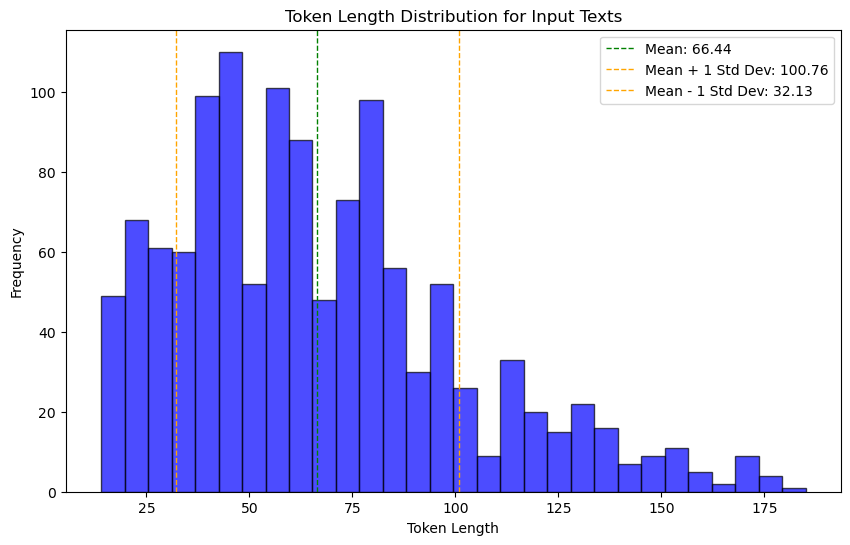

Input Texts
Mean Length66.44489465153971
Stand Devication values 34.31253655016385
MAX length tokens 185
Min length tokens 14
Mean + 1 Std Dev: 100.76
Mean - 1 Std Dev: 32.13


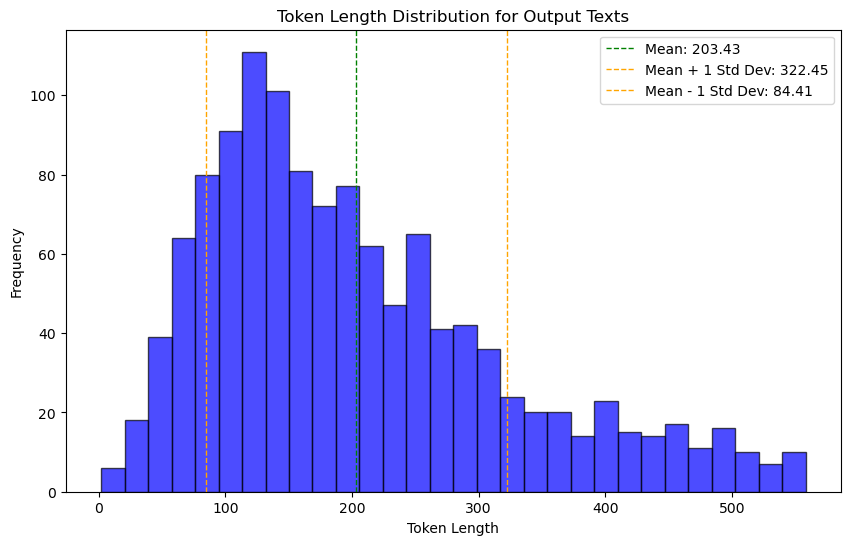

Output Texts
Mean Length203.42625607779578
Stand Devication values 119.02015405643051
MAX length tokens 558
Min length tokens 2
Mean + 1 Std Dev: 322.45
Mean - 1 Std Dev: 84.41


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming target_df is already defined and tokenized with 'inputs_text' and 'outputs_text'
train_data_path = f"{cleaned_data_path}/cleaned_predicted_consel_data.csv"
train_df = pd.read_csv(train_data_path)
train_df["input_text"] = "Please respond politely and empathetically to this query: " + train_df["questionText"] + " Diagnosis: " + train_df["re_diagnosis"]
train_df["target_text"] = train_df["clean_answer_text"]

def plot_token_distribution(target_df, text_column, title):
    token_lengths = target_df[text_column].apply(lambda text: len(tokenizer.encode(text, truncation=False)))
    
    # Calculate statistics
    mean_length = token_lengths.mean()
    std_dev = token_lengths.std()
    max_length = token_lengths.max()
    min_length = token_lengths.min()
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(token_lengths, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(mean_length, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_length:.2f}')
    plt.axvline(mean_length + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 1 Std Dev: {mean_length + std_dev:.2f}')
    plt.axvline(mean_length - std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 1 Std Dev: {mean_length - std_dev:.2f}')
    plt.title(f'Token Length Distribution for {title}')
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    print(title)
    print(f"Mean Length{mean_length}")
    print(f"Stand Devication values {std_dev}")
    print(f"MAX length tokens {max_length}")
    print(f"Min length tokens {min_length}")
    print(f'Mean + 1 Std Dev: {mean_length + std_dev:.2f}')
    print(f'Mean - 1 Std Dev: {mean_length - std_dev:.2f}')

# Plot distributions
plot_token_distribution(target_df, 'inputs_text', 'Input Texts')
plot_token_distribution(target_df, 'outputs_text', 'Output Texts')


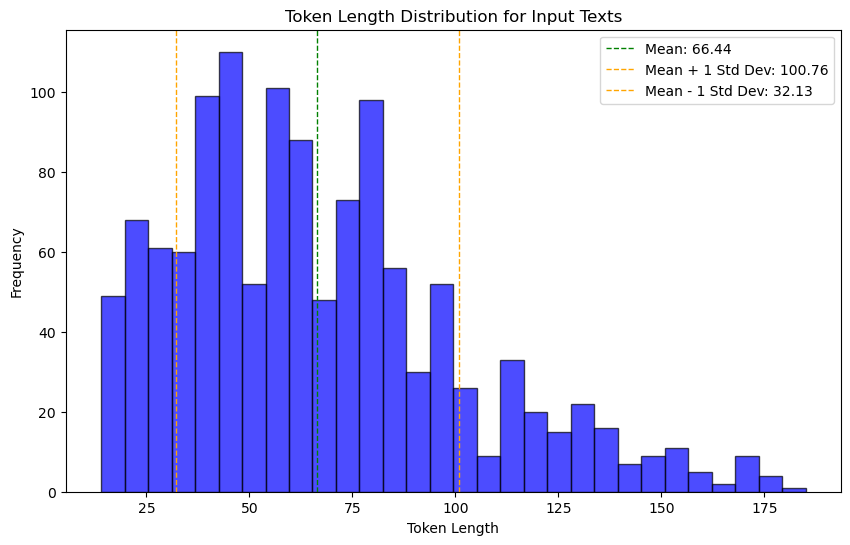

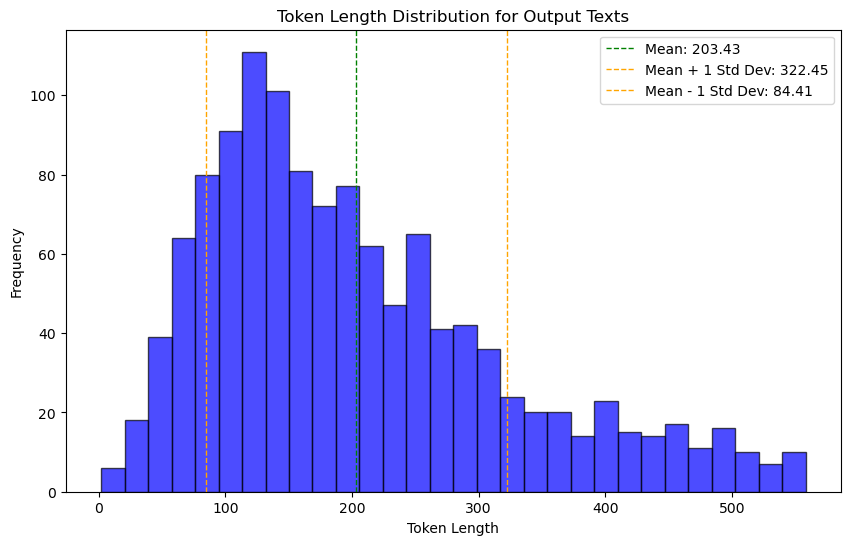

In [28]:
train_data_path = f"{cleaned_data_path}/cleaned_predicted_consel_data.csv"
train_df = pd.read_csv(train_data_path)
train_df["input_text"] = "Please respond politely and empathetically to this query: " + train_df["questionText"] + " Diagnosis: " + train_df["re_diagnosis"]
train_df["target_text"] = train_df["clean_answer_text"]


def plot_token_distribution(target_df, text_column, title):
    token_lengths = target_df[text_column].apply(lambda text: len(tokenizer.encode(text, truncation=False)))
    
    # Calculate statistics
    mean_length = token_lengths.mean()
    std_dev = token_lengths.std()
    max_length = token_lengths.max()
    min_length = token_lengths.min()
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(token_lengths, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(mean_length, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_length:.2f}')
    plt.axvline(mean_length + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 1 Std Dev: {mean_length + std_dev:.2f}')
    plt.axvline(mean_length - std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 1 Std Dev: {mean_length - std_dev:.2f}')
    plt.title(f'Token Length Distribution for {title}')
    plt.xlabel('Token Length')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot distributions
plot_token_distribution(target_df, 'inputs_text', 'Input Texts')
plot_token_distribution(target_df, 'outputs_text', 'Output Texts')



Relation Between Outputs and Inputs Token Lengths:
Mean ratio: 3.58
Standard deviation of ratio: 3.46
Maximum ratio: 32.32
Minimum ratio: 0.04


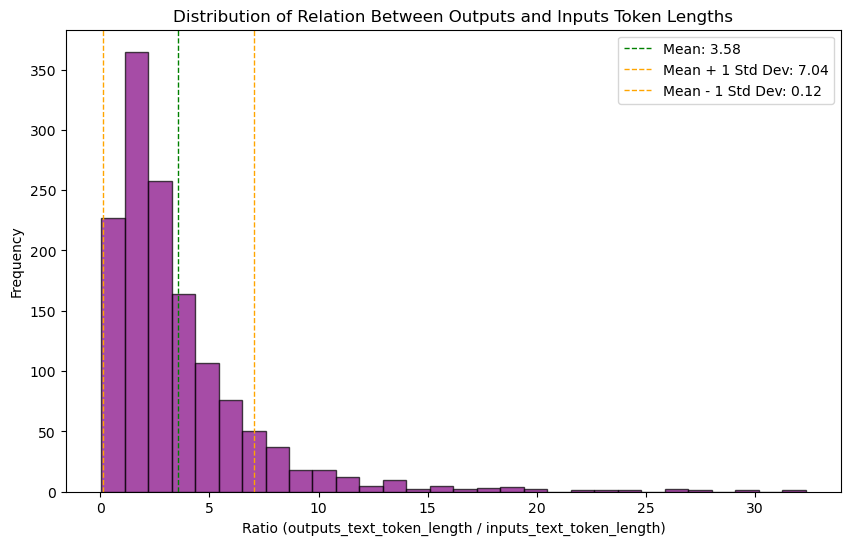

In [29]:
train_data_path = f"{cleaned_data_path}/cleaned_predicted_consel_data.csv"
train_df = pd.read_csv(train_data_path)
train_df["input_text"] = "Please respond politely and empathetically to this query: " + train_df["questionText"] + " Diagnosis: " + train_df["re_diagnosis"]
train_df["target_text"] = train_df["clean_answer_text"]

def token_analyze(target_df):
    target_df["inputs_text_token_length"] = target_df["input_text"].apply(lambda text: len(tokenizer.encode(text, truncation=False)))
    target_df["outputs_text_token_length"] = target_df["target_text"].apply(lambda text: len(tokenizer.encode(text, truncation=False)))

    # Calculate relation between output and input token lengths
    target_df["output_to_input_ratio"] = target_df["outputs_text_token_length"] / target_df["inputs_text_token_length"]

    # Summary statistics
    mean_ratio = target_df["output_to_input_ratio"].mean()
    std_dev_ratio = target_df["output_to_input_ratio"].std()
    max_ratio = target_df["output_to_input_ratio"].max()
    min_ratio = target_df["output_to_input_ratio"].min()

    print("Relation Between Outputs and Inputs Token Lengths:")
    print(f"Mean ratio: {mean_ratio:.2f}")
    print(f"Standard deviation of ratio: {std_dev_ratio:.2f}")
    print(f"Maximum ratio: {max_ratio:.2f}")
    print(f"Minimum ratio: {min_ratio:.2f}")

    # Plot distribution of the ratio
    plt.figure(figsize=(10, 6))
    plt.hist(target_df["output_to_input_ratio"], bins=30, alpha=0.7, color='purple', edgecolor='black')
    plt.axvline(mean_ratio, color='green', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ratio:.2f}')
    plt.axvline(mean_ratio + std_dev_ratio, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 1 Std Dev: {mean_ratio + std_dev_ratio:.2f}')
    plt.axvline(mean_ratio - std_dev_ratio, color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 1 Std Dev: {mean_ratio - std_dev_ratio:.2f}')
    plt.title('Distribution of Relation Between Outputs and Inputs Token Lengths')
    plt.xlabel('Ratio (outputs_text_token_length / inputs_text_token_length)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    return target_df


target_df = token_analyze(train_df)




# min_length = 20  # You can adjust these thresholds based on your needs
# max_length = 180
# def filter_token_lengths(target_df, text_column, min_length, max_length):
#     target_df['token_length'] = target_df[text_column].apply(lambda text: len(tokenizer.encode(text, truncation=False)))
#     filtered_df = target_df[(target_df['token_length'] >= min_length) & (target_df['token_length'] <= max_length)]
#     return filtered_df

# # Filter data for both inputs and outputs
# filtered_input_df = filter_token_lengths(target_df, 'inputs_text', min_length, max_length)
# filtered_output_df = filter_token_lengths(target_df, 'outputs_text', min_length, max_length)

# # Join the filtered dataframes or further filter based on intersection
# final_filtered_df = pd.merge(filtered_input_df, filtered_output_df, how='inner', on='common_column')  # Ensure 'common_column' exists or use another merging strategy

# print(f"Number of examples after filtering: {len(final_filtered_df)}")

In [30]:
ratios_filtered_target_df = target_df[target_df["output_to_input_ratio"] <= 7.02]
print(f"Number of examples after filtering: {len(ratios_filtered_target_df)}")
print(f"Number of Original Counsel Data Set {len(original_counsel_df)}")


Number of examples after filtering: 1223
Number of Original Counsel Data Set 1482



The average ratio between input and output text lengths is approximately **3.58**, with a target dataset size of **1,222** records. The next step in the data refinement process is to address the output texts that are excessively long.

The current output statistics are as follows:
- **Mean Length:** 203.18 tokens
- **Standard Deviation:** 118.58 tokens
- **Maximum Token Length:** 558 tokens
- **Minimum Token Length:** 2 tokens
- **Mean + 1 Standard Deviation:** 321.76 tokens
- **Mean - 1 Standard Deviation:** 84.60 tokens

To ensure consistency and maintain a more uniform output length, I will drop any output texts that exceed **321.76 tokens**. This approach will help maintain better balance and ensure more reliable model training.

In [31]:
length_limited_target_df = ratios_filtered_target_df[(ratios_filtered_target_df["outputs_text_token_length"] <= 321) & (ratios_filtered_target_df["inputs_text_token_length"] <= 100.17)]
print(f"Number of filtered Data Outputs length limited {len(length_limited_target_df)}")




Number of filtered Data Outputs length limited 811


In [34]:
open_AI_training_df = length_limited_target_df[["questionText", "re_diagnosis", "topics", "clean_answer_text"]].reset_index()
open_AI_training_df.to_csv("cleaned_data/open_AI_trainig.csv")
print(open_AI_training_df.head())

   index                                       questionText  \
0      2  I have secrets in my mind, and I don't know wh...   
1      4  I had a head injury a few years ago and my min...   
2      9  They're calling me names like hypocrite and a ...   
3     11  I have a lot of issues going on right now. Fir...   
4     16  Now I have anger and trust issues. How can I t...   

        re_diagnosis                                             topics  \
0     Mood Disorders                                    Family Conflict   
1  Anxiety Disorders                                            Anxiety   
2  Anxiety Disorders                               Social Relationships   
3  Anxiety Disorders                           Anxiety,Anger Management   
4  Anxiety Disorders  Domestic Violence,Anger Management,Family Conf...   

                                   clean_answer_text  
0  It sounds like keeping the secrets has become ...  
1  You didn't say what or how many medications yo...  
2  It

In [ ]:
import json

def create_open_ai_train_jsonl(df):
    prompts_and_completions = []
    for index, row in df.iterrows():
        prompt = f"Please respond to the following question related to {row['re_diagnosis']}:\n\nQuestion: {row['questionText']}\n\nResponse:"
        completion = f" {row['clean_answer_text']}"  
        prompts_and_completions.append({"prompt": prompt, "completion": completion})

    with open("openai_training_data.jsonl", "w") as file:
        for item in prompts_and_completions:
            file.write(json.dumps(item) + "\n")

create_open_ai_train_jsonl(open_AI_training_df)

# Issue regarding fine turning
- Your file contains 816 prompt-completion pairs
- All prompts end with suffix `\n\nResponse:`. This suffix seems very long. Consider replacing with a shorter suffix, such as `\n\n###\n\n`
- All prompts start with prefix `Please respond to the following question related to `. Fine-tuning doesn't require the instruction specifying the task, or a few-shot example scenario. Most of the time you should only add the input data into the prompt, and the desired output into the completion
- Your data does not contain a common ending at the end of your completions. Having a common ending string appended to the end of the completion makes it clearer to the fine-tuned model where the completion should end. See https://platform.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more detail and examples.

Based on the analysis we will perform the following actions:
- [Recommended] Remove prefix `Please respond to the following question related to ` from all prompts [Y/n]:  -->

In [ ]:
def create_open_ai_train_jsonl(df):
    prompts_and_completions = []
    for index, row in df.iterrows():
        prompt = f"Diagnosis: {row['re_diagnosis']}:\n\nQuestion: {row['questionText']}\n\n###\n\n"
        completion = f" {row['clean_answer_text']} END"  
        prompts_and_completions.append({"prompt": prompt, "completion": completion})

    with open("openai_training_data_re_2.jsonl", "w") as file:
        for item in prompts_and_completions:
            file.write(json.dumps(item) + "\n")

create_open_ai_train_jsonl(open_AI_training_df)

To use source fine test Data.
let's first of all.
Let's grab down solid unique topics first.
Then only generate 50 cases only for purpose

In [ ]:
unique_topics = open_AI_training_df["topics"].unique()
print(unique_topics)

# Count the number of unique values
num_unique_topics = len(unique_topics)
print(f"Number of unique topics: {num_unique_topics}")

# Optional: Create a DataFrame of unique rows based on 'topics'
unique_topics_df = open_AI_training_df.drop_duplicates(subset=["topics"])
print(unique_topics_df)


['Family Conflict' 'Anxiety' 'Social Relationships'
 'Anxiety,Anger Management'
 'Domestic Violence,Anger Management,Family Conflict'
 'Anger Management,Sleep Improvement' 'Anxiety,Relationships'
 'Military Issues ' 'Family Conflict,Children & Adolescents'
 'Marriage,Relationship Dissolution ' 'Grief and Loss'
 'Trauma,Human Sexuality' 'Relationships' 'Anger Management,Parenting'
 'Intimacy' 'Workplace Relationships' 'Depression'
 'Spirituality,Family Conflict' 'Professional Ethics' 'Parenting'
 'Parenting,Relationships' 'Anxiety,Career Counseling'
 'Self-esteem,Relationships' 'Relationships,Self-esteem'
 'Relationships,Marriage' 'Eating Disorders,Addiction'
 'Workplace Relationships,Professional Ethics' 'Trauma,Depression'
 'Sleep Improvement' 'Anxiety,Depression' 'Depression,Self-esteem'
 'Self-esteem' 'Relationship Dissolution ,Relationships,Domestic Violence'
 'Self-esteem,Relationship Dissolution ' 'Depression,Anger Management'
 'LGBTQ' 'LGBTQ,Intimacy' 'Relationship Dissolution ,

In [ ]:
random_sample_10_anxiety = unique_topics_df[unique_topics_df["re_diagnosis"] == "Anxiety Disorders"].sample(n=10, random_state=42)
random_sample_5_stress = unique_topics_df[unique_topics_df["re_diagnosis"] == "Stress-Related Disorders"].sample(n=5, random_state=42)
random_sample_10_mood = unique_topics_df[unique_topics_df["re_diagnosis"] == "Mood Disorders"].sample(n=10, random_state=42)

extract_df = pd.concat([random_sample_10_anxiety, random_sample_5_stress, random_sample_10_mood]).reset_index()
print(extract_df.head())

   level_0  index                                       questionText  \
0      433    778  I stress over everything. If I don't have enou...   
1       88    175  I am currently suffering from erectile dysfunc...   
2      477    850  I've known him for about six years. We've date...   
3      479    854  Every time my partner gets angry for anything,...   
4        1      4  I had a head injury a few years ago and my min...   

        re_diagnosis                                    topics  \
0  Anxiety Disorders   Anxiety,Depression,Stress,Relationships   
1  Anxiety Disorders             Human Sexuality,Relationships   
2  Anxiety Disorders            Relationships,Intimacy,Anxiety   
3  Anxiety Disorders  Intimacy,Relationships,Domestic Violence   
4  Anxiety Disorders                                   Anxiety   

                                   clean_answer_text  
0  Everyone has some level of anxiety - it's what...  
1  Hi, First and foremost, I want to acknowledge ...  
2  I 

{"messages": [{"role": "system", "content": "System message"}, 
              {"role": "user", "content": "User message"}, 
              {"role": "assistant", "content": "Assistant response"}]}


{"messages": [{"role": "system", "content": "Your task is to classify a piece 
of text into the following category labels: [\"Cancer_present\", 
\"Cancer_past\", \"Cancer_relative\", \"No_Cancer\"]."}, 
{"role": "user", "content": "She was diagnosed with stage 3 colon cancer 
last month."}, 
{"role": "assistant", "content": "Cancer_present"}]}

In [ ]:
def create_open_ai_chat_train_jsonl(df):
    chat_data = []
    for index, row in df.iterrows():
        # Constructing the messages array
        messages = [
            {"role": "system", "content": f"Based on the diagnosis '{row['re_diagnosis']}', please provide advice."},
            {"role": "user", "content": row['questionText']},
            {"role": "assistant", "content": row['clean_answer_text']}
        ]
        chat_data.append({"messages": messages})

    # Save data to a JSONL file
    with open("openai_training_data_re_4.jsonl", "w") as file:
        for item in chat_data:
            file.write(json.dumps(item) + "\n")

# Creating the JSONL data file using the provided DataFrame
create_open_ai_chat_train_jsonl(unique_topics_df)

In [ ]:
import sys
import os
import pkg_resources

# Print Python version
print("Python version:")
print(sys.version)
print()

# Print Python executable path
print("Python executable:")
print(sys.executable)
print()

# Print installed modules and their versions
print("Installed Python modules and versions:")
for package in pkg_resources.working_set:
    print(f"{package.project_name}=={package.version}")
print()

# Print environment variables
print("Environment variables:")
for key, value in os.environ.items():
    print(f"{key}: {value}")


import logging

logging.basicConfig(filename="environment_log.txt", level=logging.INFO)

logging.info("Python version:")
logging.info(sys.version)
logging.info("Installed Python modules and versions:")
for package in pkg_resources.working_set:
    logging.info(f"{package.project_name}=={package.version}")
logging.info("Environment variables:")
for key, value in os.environ.items():
    logging.info(f"{key}: {value}")

Python version:
3.12.4 (v3.12.4:8e8a4baf65, Jun  6 2024, 17:33:18) [Clang 13.0.0 (clang-1300.0.29.30)]

Python executable:
/usr/local/bin/python3

Installed Python modules and versions:
appnope==0.1.4
asttokens==2.4.1
comm==0.2.2
debugpy==1.8.5
decorator==5.1.1
executing==2.0.1
ipykernel==6.29.5
ipython==8.27.0
jedi==0.19.1
jupyter-client==8.6.2
jupyter-core==5.7.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
parso==0.8.4
pexpect==4.9.0
platformdirs==4.2.2
prompt-toolkit==3.0.47
psutil==6.0.0
ptyprocess==0.7.0
pure-eval==0.2.3
pygments==2.18.0
pyzmq==26.2.0
stack-data==0.6.3
tornado==6.4.1
traitlets==5.14.3
wcwidth==0.2.13
Django==3.2.25
MarkupSafe==3.0.2
PyJWT==2.8.0
PyYAML==6.0.2
asgiref==3.8.1
beautifulsoup4==4.12.3
cachecontrol==0.14.0
cachetools==5.4.0
certifi==2024.7.4
cffi==1.16.0
charset-normalizer==3.3.2
chunkit==0.2.8
click==8.1.7
contourpy==1.2.1
cryptography==42.0.8
cycler==0.12.1
dj-database-url==2.2.0
django-environ==0.11.2
djangorestframework==3.15.1
et-xmlfile==1.1.0
fi